In [22]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels
from HW2.optimization import *

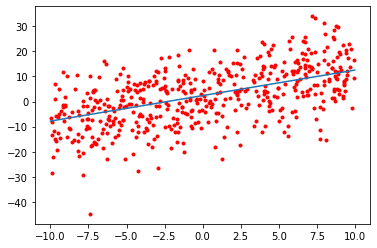

In [23]:
f, points = generate_regression(point_count=500, scale=3, y_scale=10)

visualize_regression_point(f, points)

storage = BenchmarkStorage()

# No optimizations

[0.89737215 0.30349961]
Benchmark results for config <('sgd', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.025004
Mean memory:0.0B
Mean SMAPE value:0.5994875063434928
Mean RMSE value:9.754137781770277
Mean logcosh value:7.159373572285513
Mean gradient calls:147.0
Iterations done:147.0


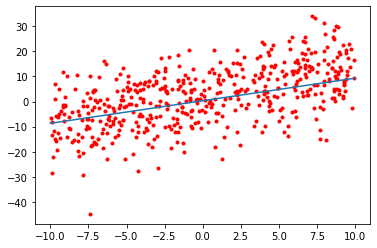

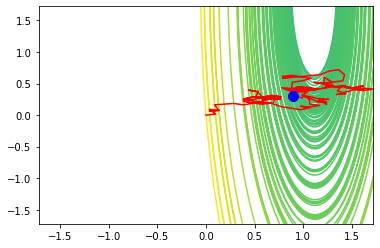

In [24]:
index = storage.add_benchmark_config()
ab, meta = sgd(points)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

# Momentum optimization

[1.34511979 0.59026916]
Benchmark results for config <('sgd', 1, Momentum optimization (beta=0.95), Squared error calculator)>:
Mean time:0.033997
Mean memory:0.0B
Mean SMAPE value:0.5561468048882245
Mean RMSE value:9.717635371138114
Mean logcosh value:7.1422033892093655
Mean gradient calls:109.0
Iterations done:109.0


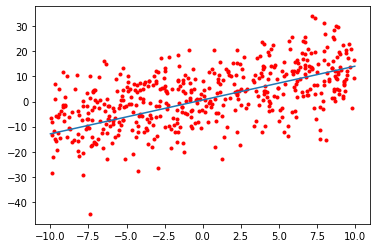

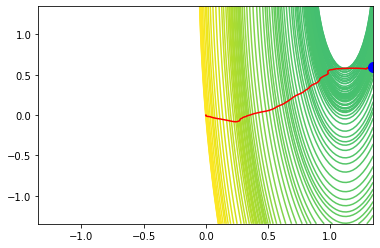

In [25]:
optimization = MomentumOptimization(beta=0.95)
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = sgd(points, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

# Nesterov optimization

[ 1.12523842 -0.02728476]
Benchmark results for config <('sgd', 1, Nesterov optimization (beta=0.95), Squared error calculator)>:
Mean time:0.006989
Mean memory:0.0B
Mean SMAPE value:0.5736834518533237
Mean RMSE value:9.732217199538326
Mean logcosh value:7.161939734500149
Mean gradient calls:50.0
Iterations done:50.0


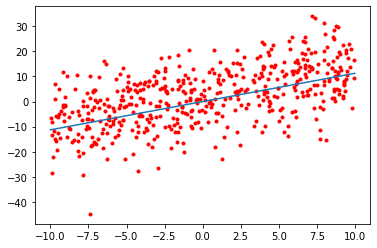

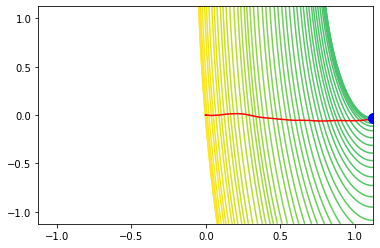

In [26]:
optimization = NesterovOptimization(beta=0.95)
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = sgd(points, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

# AdaGrad optimization

[0.30824986 0.26588285]
Benchmark results for config <('sgd', 1, Ada gradient optimization (eps=1e-05), Squared error calculator)>:
Mean time:0.007006
Mean memory:0.0B
Mean SMAPE value:0.7450052127584939
Mean RMSE value:10.757636472463846
Mean logcosh value:7.929265312216858
Mean gradient calls:54.0
Iterations done:54.0


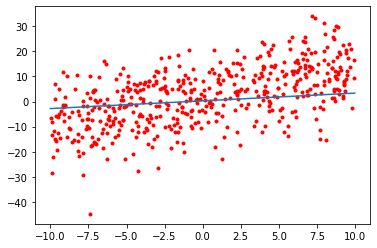

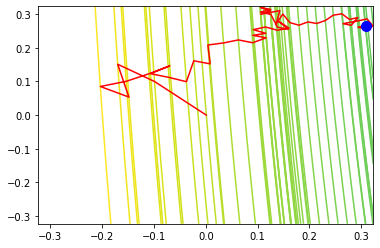

In [27]:
optimization = AdaGradOptimization()
ab, meta = sgd(points, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
index = storage.add_benchmark_config(optimiser=optimization)
draw_levels(points, meta["points"])

# RMSProp optimization

[1.22999163 2.88114063]
Benchmark results for config <('sgd', 1, RMS prop optimization (gamma=0.5, eps=1e-05), Squared error calculator)>:
Mean time:1.634997
Mean memory:7.09MB
Mean SMAPE value:0.5643300731131438
Mean RMSE value:9.601293659519905
Mean logcosh value:7.022666507572288
Mean gradient calls:10000.0
Iterations done:10000.0


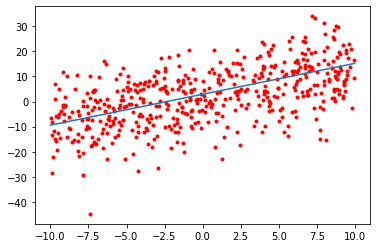

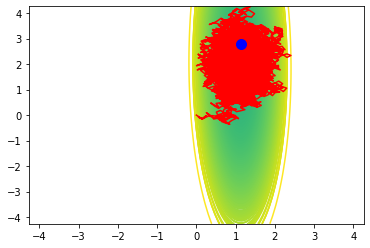

In [30]:
optimization = RMSPropOptimization(gamma=0.5)
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = sgd(points, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

[0.74124592 1.48267438]
Benchmark results for config <('sgd', 1, RMS prop optimization (gamma=0.5, eps=1e-05), Squared error calculator)>:
Mean time:8.661014
Mean memory:1.29MB
Mean SMAPE value:0.6117709000911424
Mean RMSE value:9.782695917569734
Mean logcosh value:7.128277254072728
Mean gradient calls:500000.0
Iterations done:10000.0


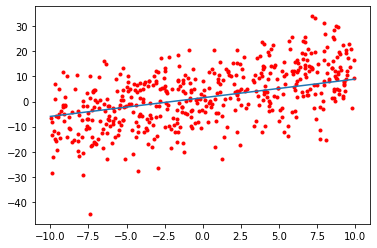

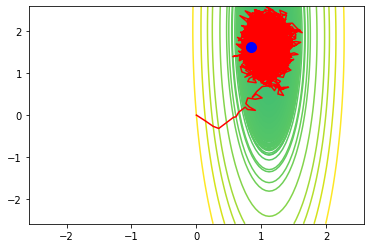

In [31]:
optimization = RMSPropOptimization(gamma=0.5)
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = minibatch_gd(points, batch_size=50, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

# Adam optimization

[0.635731   1.99635464]
Benchmark results for config <('sgd', 1, Adam optimization (beta_1=0.9, beta_2=0.999, eps=1e-05), Squared error calculator)>:
Mean time:0.182047
Mean memory:192.51kB
Mean SMAPE value:0.6296081999652929
Mean RMSE value:9.92279248068952
Mean logcosh value:7.222533371112519
Mean gradient calls:1522.0
Iterations done:1522.0


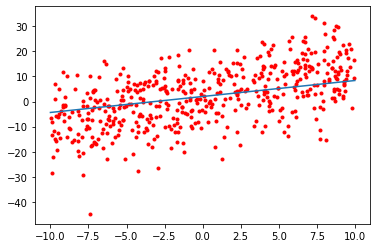

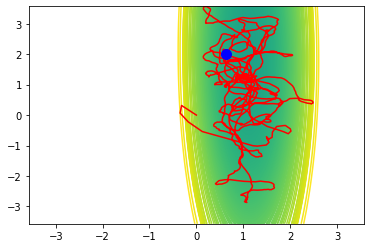

In [29]:
optimization = AdamOptimization()
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = sgd(points, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

[1.19840307 1.33361811]
Benchmark results for config <('sgd', 1, Adam optimization (beta_1=0.9, beta_2=0.999, eps=1e-05), Squared error calculator)>:
Mean time:0.937
Mean memory:229.38kB
Mean SMAPE value:0.5607913545766301
Mean RMSE value:9.562218760873975
Mean logcosh value:7.018359537432969
Mean gradient calls:47750.0
Iterations done:955.0


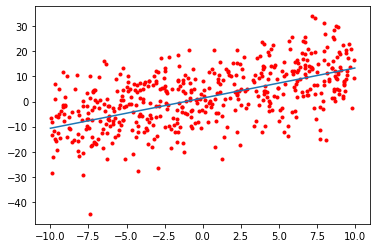

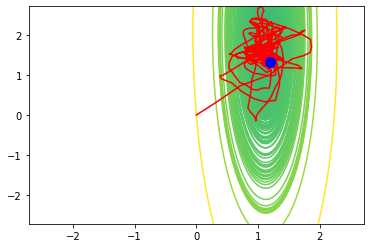

In [32]:
optimization = AdamOptimization()
index = storage.add_benchmark_config(optimiser=optimization)
ab, meta = minibatch_gd(points, batch_size=50, optimization=optimization)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, points)
draw_levels(points, meta["points"])

# Benchmark

In [34]:
optimizators = [DefaultOptimization(), MomentumOptimization(0.95), NesterovOptimization(0.95), AdaGradOptimization(),
                RMSPropOptimization(0.5), AdamOptimization()]

result = np.array([])
for optimization in tqdm(optimizators, "Optimization"):
    index = storage.add_benchmark_config(optimiser=optimization)
    for _ in range(20):
        ab, meta = minibatch_gd(points, optimization=optimization)
        storage.add_benchmark_result(index, meta)
    result = np.append(result, storage.get_benchmark_results_arrayed(index))

result = result.reshape((-1, 8))
df = pd.DataFrame(result, columns=[
    'Config',
    'Mean time',
    'Mean mem',
    'Mean SMAPE',
    'Mean RMSE',
    'Mean logcosh',
    'Mean gradient calls',
    'Mean iterations'
])
df.to_csv("data/2.3.csv", sep='\t')
df

Optimization:   0%|          | 0/6 [00:00<?, ?it/s]

,Config,Mean time,Mean mem,Mean SMAPE,Mean RMSE,Mean logcosh,Mean gradient calls,Mean iterations
0,"(sgd, 1, Default(no) optimization, Squared err...",0.026854,0.0B,0.593431,9.866752,7.247812,162.6,162.6
1,"(sgd, 1, Momentum optimization (beta=0.95), Sq...",0.007845,0.0B,0.589952,9.889977,7.271759,88.25,88.25
2,"(sgd, 1, Nesterov optimization (beta=0.95), Sq...",0.008901,0.0B,0.583908,9.783603,7.186012,85.25,85.25
3,"(sgd, 1, Ada gradient optimization (eps=1e-05)...",0.005,0.0B,0.869994,11.313494,8.409834,50.0,50.0
4,"(sgd, 1, RMS prop optimization (gamma=0.5, eps...",1.080699,2.87kB,0.582574,9.747024,7.127201,10000.0,10000.0
5,"(sgd, 1, Adam optimization (beta_1=0.9, beta_2...",0.037593,0.0B,0.584618,9.827133,7.205612,375.4,375.4
